<a href="https://colab.research.google.com/github/Praise-Atadja/Data_preprocessing/blob/main/ml_pipeline_%5BPraise_Atadja%5D_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: [Early-Intervention Intelligence for Cognitive Development (Autism Prediction)]
## [EIICD]

## Student Name: [PRAISE ATADJA]

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)
   
   **Your answer for data sources goes here **
    
***Data Sources***:

Here is a concise summary of each data source, highlighting their critical contributions and potential impact on autism detection:

- **UC Irvine Machine Learning Repository (Autistic Spectrum Disorder Screening Data for Children)**:

This dataset contains information about individuals, including their scores on various screening questions for Autism Spectrum Disorder (ASD), demographic details such as age, gender, and ethnicity, as well as other factors like whether they have previously used ASD screening apps or if they have a family history of autism. Each individual is classified as either having ASD or not based on the screening results. [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/419/autistic+spectrum+disorder+screening+data+for+children)


- **UC Irvine Machine Learning Repository (Autistic Spectrum Disorder Screening Data for Adults)**:

This dataset contains information about adults and their scores on various screening questions for Autism Spectrum Disorder (ASD), along with demographic details such as age, gender, and ethnicity. It aims to facilitate the analysis of influential autistic traits and improve the classification of ASD cases. There are 704 instances and 21 attributes in the dataset, which includes missing values, and it is suitable for classification tasks in the medical, health, and social science domains. [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/426/autism+screening+adult)

 - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   **Your answer for data agggregation goes here **

***Necessity for Data Aggregation***

In reference to the provided data sources:

Data aggregation from multiple sources is necessary for comprehensive analysis as it allows for a broader coverage across different age groups (children and adults), enhances the sample size for statistical significance, validates findings through cross-verification, and addresses potential data gaps or biases present in individual datasets.
   



In [422]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.stats
from scipy.stats import mstats
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [376]:
#load data
df_children  = pd.read_csv('/content/drive/MyDrive/Autism-Child-Data.csv')
df_adults  = pd.read_csv('/content/drive/MyDrive/Autism-Adult-Data.csv')



2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Your answer for data transformation goes here **

***Current Format of the Data:***

The current format of the data varies slightly across the three datasets:  children and adults. Each dataset consists of multiple instances (cases) where each instance represents an individual, and each instance contains several attributes/features related to autism screening, such as behavioral responses, demographic information, and diagnostic outcomes. The attributes include categorical, binary, and continuous variables, and the datasets are intended for classification tasks in the medical, health, and social science domains.

***Outline of Planned Transformation to Unified Format:***

To achieve a unified format suitable for analysis and modeling, the following steps will be taken:

- Ensure that each dataset has the same set of features with consistent naming conventions.
- Standardize categorical variables if necessary.
- Address missing values and inconsistencies in the data.
- Merge the datasets into a single dataset, ensuring compatibility of features and target variables.



3. **Data Exploration:**
   - Enumerate the features included in the dataset.

***The features in the combined dataset include:***

- ID: A unique identifier for each individual in the dataset.
- A1-A10 Scores: Scores on 10 different questions or items used for screening ASD.
- Age: Age of the individual, either in months for toddlers or in years for children and adults.
- Gender: Gender of the individual.
- Ethnicity: Ethnicity or racial background of the individual.
- Jaundice: Indicates whether the individual had jaundice.
- Family Member with ASD: Indicates whether there is a family member diagnosed with ASD.
- Who Completed the Test: Specifies who completed the screening test for the individual.
- Result: Result of the ASD screening, indicating the presence or absence of ASD.
- Age Description: Description of the age range the individual falls into.
- Relation: Relation of the individual who completed the test to the individual being screened.
- Class/ASD: Target variable indicating the presence or absence of ASD.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   Data Exploration:




   
  **Insert code for data exploration below**

In [377]:
# Enumerate features included in the dataset
print("Features included in the child dataset:")
for feature in df_children.columns:
    print("-", feature)


Features included in the child dataset:
- id
- A1_Score
- A2_Score
- A3_Score
- A4_Score
- A5_Score
- A6_Score
- A7_Score
- A8_Score
- A9_Score
- A10_Score
- age
- gender
- ethnicity
- jundice
- austim
- contry_of_res
- used_app_before
- result
- age_desc
- relation
- Class/ASD


In [378]:
# Enumerate features included in the dataset
print("Features included in the adult dataset:")
for feature in df_adults.columns:
    print("-", feature)

Features included in the adult dataset:
- id
- A1_Score
- A2_Score
- A3_Score
- A4_Score
- A5_Score
- A6_Score
- A7_Score
- A8_Score
- A9_Score
- A10_Score
- age
- gender
- ethnicity
- jundice
- austim
- contry_of_res
- used_app_before
- result
- age_desc
- relation
- Class/ASD


In [379]:
# Data Overview in Child Dataset
print("\nChildren Data Overview:")
print(df_children.info())
print("\nSummary Statistics:")
print(df_children.describe())


Children Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               292 non-null    int64 
 1   A1_Score         292 non-null    int64 
 2   A2_Score         292 non-null    int64 
 3   A3_Score         292 non-null    int64 
 4   A4_Score         292 non-null    int64 
 5   A5_Score         292 non-null    int64 
 6   A6_Score         292 non-null    int64 
 7   A7_Score         292 non-null    int64 
 8   A8_Score         292 non-null    int64 
 9   A9_Score         292 non-null    int64 
 10  A10_Score        292 non-null    int64 
 11  age              292 non-null    object
 12  gender           292 non-null    object
 13  ethnicity        292 non-null    object
 14  jundice          292 non-null    object
 15  austim           292 non-null    object
 16  contry_of_res    292 non-null    object
 17  used_app_b

In [380]:
# Data Overviw in Adult Dataset
print("\nAdults Data Overview:")
print(df_adults.info())
print("\nSummary Statistics:")
print(df_adults.describe())


Adults Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               704 non-null    int64 
 1   A1_Score         704 non-null    int64 
 2   A2_Score         704 non-null    int64 
 3   A3_Score         704 non-null    int64 
 4   A4_Score         704 non-null    int64 
 5   A5_Score         704 non-null    int64 
 6   A6_Score         704 non-null    int64 
 7   A7_Score         704 non-null    int64 
 8   A8_Score         704 non-null    int64 
 9   A9_Score         704 non-null    int64 
 10  A10_Score        704 non-null    int64 
 11  age              704 non-null    object
 12  gender           704 non-null    object
 13  ethnicity        704 non-null    object
 14  jundice          704 non-null    object
 15  austim           704 non-null    object
 16  contry_of_res    704 non-null    object
 17  used_app_bef

In [381]:
print(df_children['age'])

0      6
1      6
2      6
3      5
4      5
      ..
287    7
288    7
289    4
290    4
291    4
Name: age, Length: 292, dtype: object


In [382]:
# Replace non-numeric values with NaN in children dataset
df_children['age'] = pd.to_numeric(df_children['age'], errors='coerce')

# Replace non-numeric values with NaN in adults dataset
df_adults['age'] = pd.to_numeric(df_adults['age'], errors='coerce')



Analysis for Children:


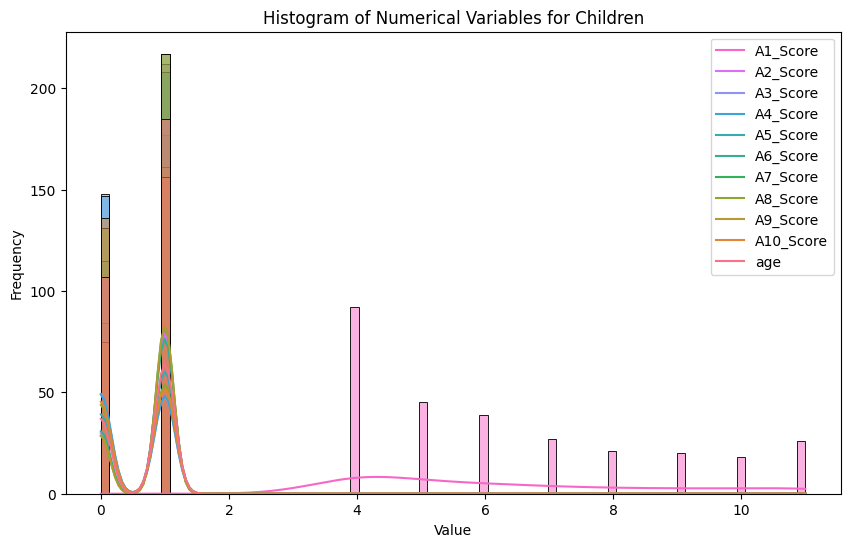


Analysis for Adults:


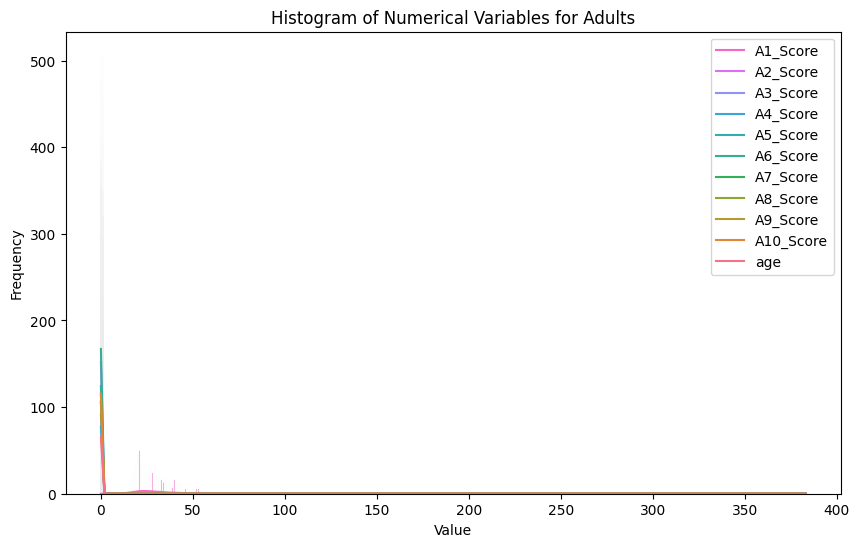

In [383]:
# Distributions of numerical features
print("\nAnalysis for Children:")
plt.figure(figsize=(10, 6))
sns.histplot(data=df_children[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                               'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']], kde=True)
plt.title('Histogram of Numerical Variables for Children')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
            'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age'], loc='upper right')
plt.show()

print("\nAnalysis for Adults:")
plt.figure(figsize=(10, 6))
sns.histplot(data=df_adults[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                             'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']], kde=True)
plt.title('Histogram of Numerical Variables for Adults')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
            'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age'], loc='upper right')
plt.show()


<ipython-input-384-59d599ab7734>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_children = df_children.corr()


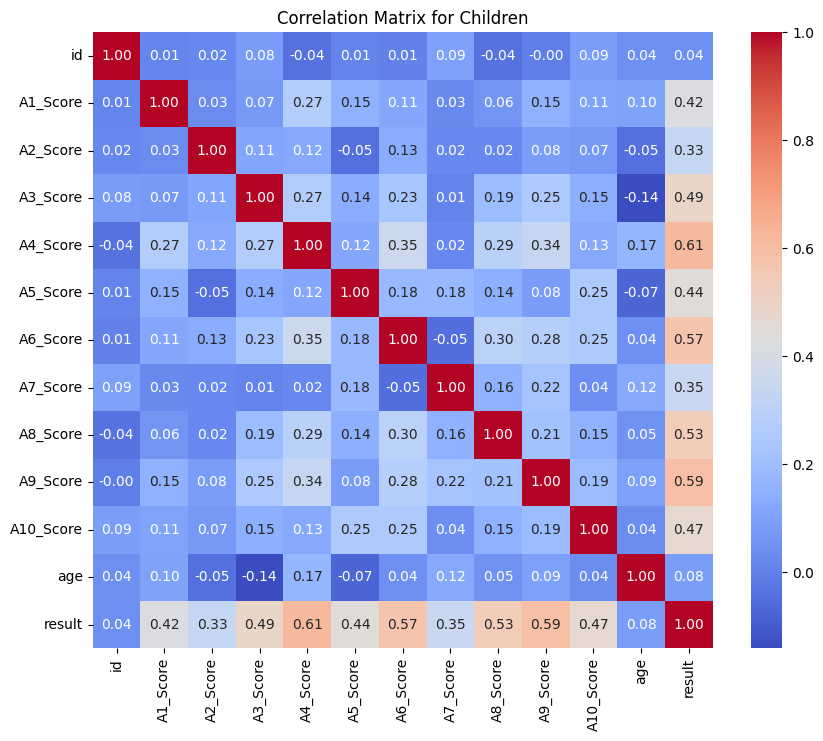

<ipython-input-384-59d599ab7734>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_adults = df_adults.corr()


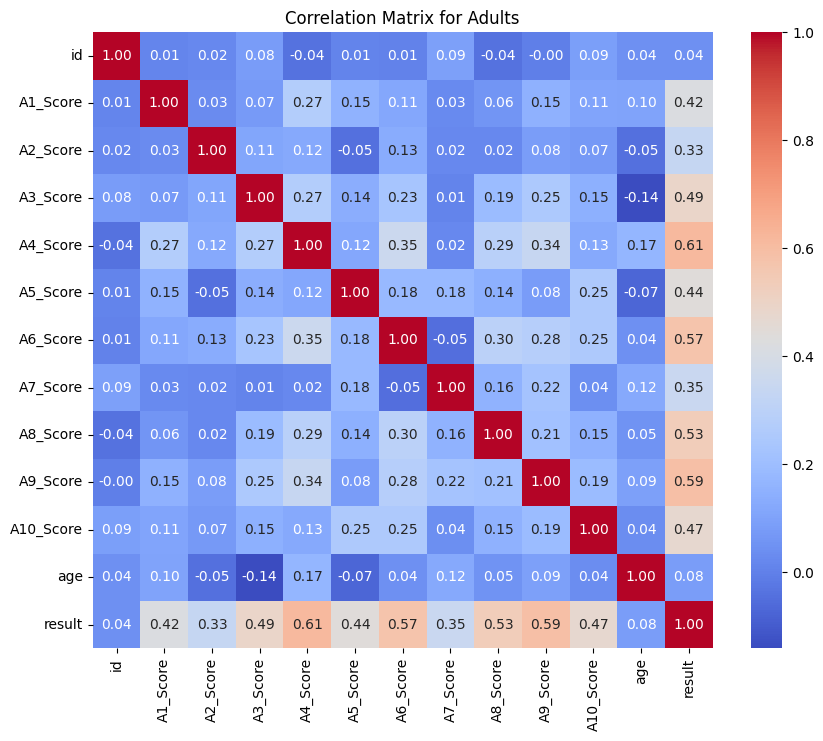

In [384]:
# Correlation Matrix for Children
correlation_matrix_children = df_children.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_children, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Children')
plt.show()

# Correlation Matrix for Adults (using the same variable as for children)
correlation_matrix_adults = df_adults.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_children, annot=True, cmap='coolwarm', fmt=".2f")  # using the same variable
plt.title('Correlation Matrix for Adults')
plt.show()


In [385]:
# Outliers for Age in Children
print(f'Maximum age is data:', df_children['age'].max())
print(f'Minimum age is data:', df_children['age'].min())

Maximum age is data: 11.0
Minimum age is data: 4.0


In [386]:
# Outliers for Age in Adults
print(f'Maximum age is data:', df_adults['age'].max())
print(f'Minimum age is data:', df_adults['age'].min())
df_children[df_adults['age'] == df_adults['age'].max()]

Maximum age is data: 383.0
Minimum age is data: 17.0


<ipython-input-386-6113560eccca>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_children[df_adults['age'] == df_adults['age'].max()]


,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,53,1,0,0,1,0,1,0,1,1,...,m,?,no,no,Jordan,no,6,4-11 years,?,NO




4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   **Your answer for Hypothesis Testing goes here **
**The preexisting hypotheses about the data are as follows:**

- Gender Hypothesis: The gender of individuals may affect ASD cases, with one gender being more susceptible than the other.

- Ethnicity Hypothesis: Different ethnicities may have varying prevalence rates of ASD, suggesting that ethnicity could be a factor influencing ASD cases.

- Age Hypothesis: Age may play a role in ASD cases, with certain age groups showing a higher likelihood of ASD diagnosis compared to others.

- Jaundice Hypothesis: Jundice, a medical condition characterized by yellowing of the skin and eyes, could potentially be correlated with ASD cases.

- Austim Hypothesis: Whether an individual has a family history of autism (austim) might influence the likelihood of ASD diagnosis.

- Relationship Hypothesis: The relationship of the individual to the respondent could affect ASD diagnosis rates.

***Methodologies***
- Bar Charts: Bar charts are useful for visualizing categorical data, such as gender, ethnicity, and relationship status, against the number of ASD cases. They provide a clear comparison of ASD cases across different categories.

- Scatter Plots: Scatter plots are effective for exploring the relationship between continuous variables, such as age and Qchat-10-Score, and the number of ASD cases. They help visualize any potential patterns or trends in the data.

- Statistical Tests: Statistical tests, such as chi-square tests for categorical variables and correlation analysis (e.g., Pearson correlation coefficient) for continuous variables, can quantify the strength and significance of the relationship between each feature and the number of ASD cases. They provide empirical evidence to support or refute hypotheses about the associations between features and ASD prevalence.




  

In [440]:
# Merge datasets
try:
    merged_data = pd.concat([df_adults, df_children], ignore_index=True)
    print("Datasets concatenated successfully.")
except ValueError as e:
    print("Error:", e)
    print("Column mismatch detected. Check column names and data types in both datasets.")




Datasets concatenated successfully.


In [424]:
# Replace non-finite values (such as NaN) with the mean age
mean_age = merged_data['age'].mean()
merged_data['age'].fillna(mean_age, inplace=True)

# Convert 'age' column to integer
merged_data['age'] = merged_data['age'].astype(int)

In [444]:
print(merged_data['age'])

0      26.0
1      24.0
2      27.0
3      35.0
4      40.0
       ... 
991     7.0
992     7.0
993     4.0
994     4.0
995     4.0
Name: age, Length: 996, dtype: float64


In [388]:
print(merged_data.columns)

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [428]:
# Drop Unused columns
# App use doesn't determine ASD
merged_data.drop(columns=['age_desc', 'age_range'], inplace=True)
merged_data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,26,f,White-European,no,no,United States,no,6,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,24,m,Latino,no,yes,Brazil,no,5,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,27,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,35,f,White-European,no,yes,United States,no,6,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,40,f,?,no,no,Egypt,no,2,?,NO


Age_desc is contant accross datasets

In [445]:
# Rename mispelled column names
merged_data = merged_data.rename(columns = {'austim' : 'autism', 'jundice' : 'jaundice', 'contry_of_res' : 'country_of_res', 'Self' : 'self'})
merged_data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


 5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
  
  **Assess Data Density**:




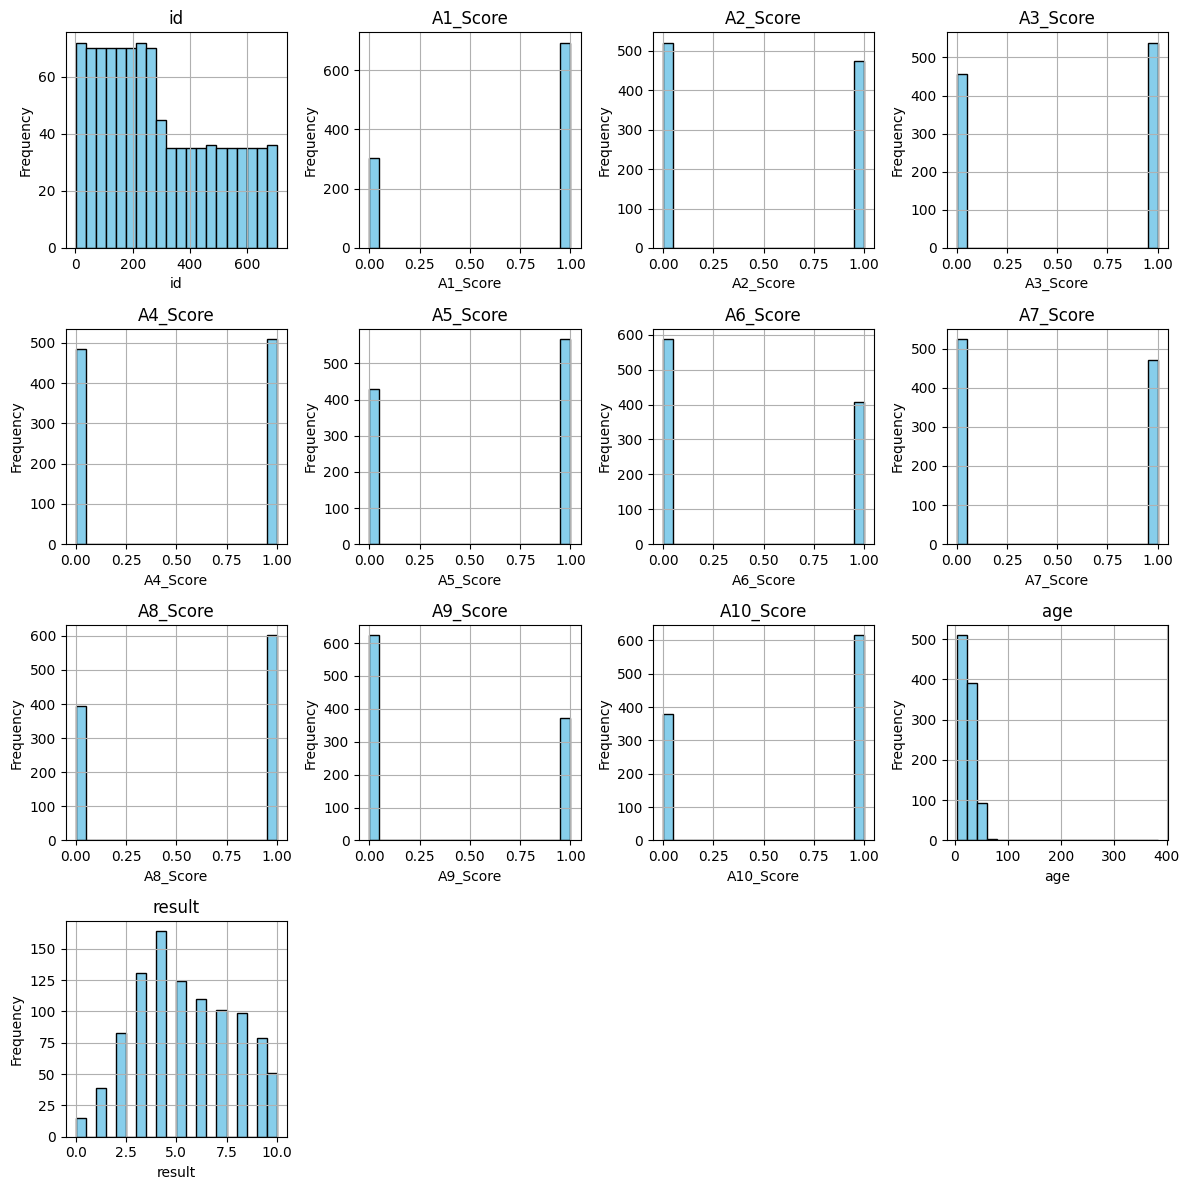

In [391]:
# Visualize the distribution of numerical features
numerical_features = merged_data.select_dtypes(include=['int', 'float']).columns

num_features = len(numerical_features)
num_rows = (num_features + 3) // 4  # Calculate the number of required rows

plt.figure(figsize=(12, 3 * num_rows))  # Adjust the figure size based on the number of rows

for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, 4, i+1)
    merged_data[feature].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


 - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

**Missing Values**

1. To handle missing data in the 'ethnicity' and 'relation' columns of the dataset while maintaining dataset integrity is to assign a new category 'Unknown' to represent missing values in both 'ethnicity' and 'relation' columns.
2. To handle missing data in the 'age' column in the dataset is to replace missing values with the mean or median of the 'age' column.

**Outliers**

1. To handle outlier 383 in age column is to while maintaining dataset integrity in the dataset is to remove it.

Insert code for Handling Sparse/Dense Data and Outliers below

In [392]:
# Handling Missing Data

merged_data['ethnicity'].replace('?', 'Unknown', inplace=True)
merged_data['relation'].replace('?', 'Unknown', inplace=True)


In [393]:
# Handling Outliers
print(f'Maximum age is data:', merged_data['age'].max())
print(f'Minimum age is data:', merged_data['age'].min())

Maximum age is data: 383
Minimum age is data: 4


In [394]:
merged_data[merged_data['age'] == merged_data['age'].max()]

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
52,53,1,0,0,0,0,0,0,0,0,...,383,f,Pasifika,no,no,New Zealand,no,1,Self,NO


In [395]:
# Removing row 52 as the respondent has an age of 383 which is impossible.
merged_data.drop(index = [52], inplace = True)
merged_data.reset_index(inplace = True)

In [396]:
merged_data[merged_data['age'] == merged_data['age'].max()]

,index,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
7,7,8,1,1,1,1,0,0,0,0,...,64,m,White-European,no,no,New Zealand,no,5,Parent,NO


In [397]:
# Convert 'age' column from float to integer
merged_data['age'] = merged_data['age'].astype(int)

6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.
   
- Randomization: Shuffle the entire dataset to ensure randomness and prevent biases in the data order.
- Stratified Splitting: If the dataset is imbalanced, perform stratified splitting to maintain similar class distributions across subsets.
- Percentage Split: Allocate percentages for training, validation, and testing sets, such as 70%, 15%, and 15%, respectively.
- Splitting Process: Initially divide the dataset into a combined training-validation set and a testing set, then further split the training-validation set into training and validation subsets.
- Implementation: Utilize libraries like scikit-learn or TensorFlow/Keras for the splitting process, ensuring to set a random seed for reproducibility if required.




7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
  
- Techniques for identifying and and mitigating biases in the dataset:


1. Stratified Sampling: Ensure that each subset (training, validation, testing) maintains the same distribution of sensitive attributes (e.g., race, gender) as the original dataset.

2. Bias Analysis: Before splitting, conduct bias analysis using metrics like disparate impact or statistical parity difference to identify biases in the dataset.

3. Fairness-Aware Splitting: Implement fairness-aware splitting techniques that adjust the sampling process to minimize disparities in each subset.

4. Randomization: Shuffle the dataset before splitting to prevent any inherent ordering or biases.

5. Representativeness Check: After splitting, verify that each subset accurately represents the diversity present in the original dataset, particularly in terms of sensitive attributes.

In [398]:
# Normalize Data
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the 'age' column
merged_data['age'] = scaler.fit_transform(merged_data[['age']])

In [399]:
# Split combined dataset into features (X) and target variable (y)
X =merged_data.drop(columns=['Class/ASD'])
y = merged_data['Class/ASD']

# Perform randomization
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# Further split training-validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, stratify=y_train_val, random_state=42)


In [400]:
# Verify the shapes of the subsets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (696, 21) (696,)
Validation set shape: (149, 21) (149,)
Testing set shape: (150, 21) (150,)


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **


Analyzing Each Column

Ethnicity

In [401]:
merged_data.groupby('ethnicity').size()

ethnicity
Asian              169
Black               57
Hispanic            20
Latino              28
Middle Eastern     119
Others              44
Pasifika            13
South Asian         57
Turkish              8
Unknown            138
White-European     341
others               1
dtype: int64

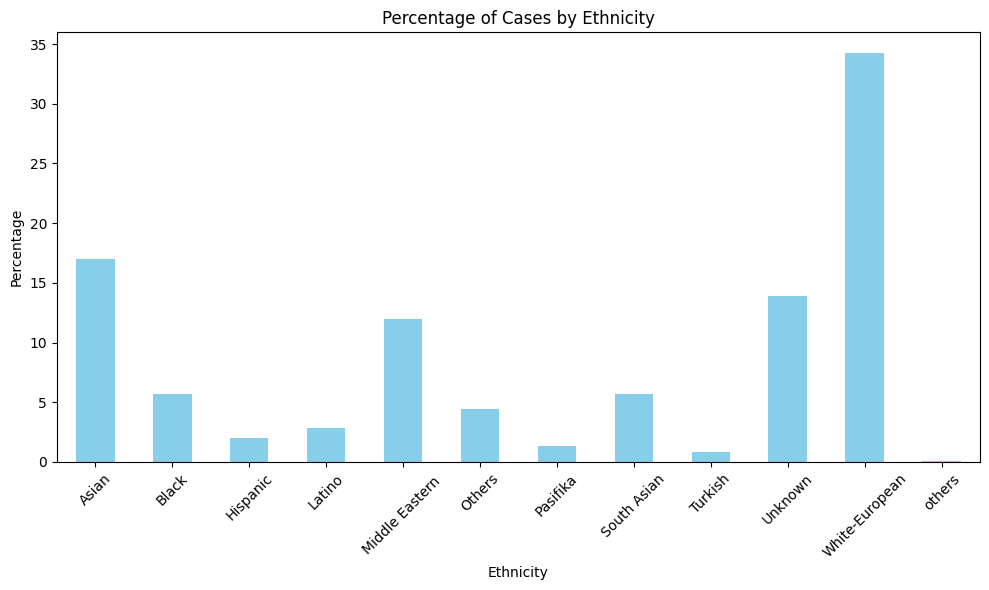

In [402]:
# Group the data by ethnicity and calculate the size of each group
ethnicity_counts = merged_data.groupby('ethnicity').size()

# Calculate the total number of cases
total_cases = ethnicity_counts.sum()

# Calculate the percentage of cases for each ethnicity
ethnicity_percentages = (ethnicity_counts / total_cases) * 100

# Plot the percentages
plt.figure(figsize=(10, 6))
ethnicity_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Cases by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion : White Europeans have most cases of ASD around the world followed by asians.

Gender

In [403]:
merged_data.groupby('gender').size()

gender
f    420
m    575
dtype: int64

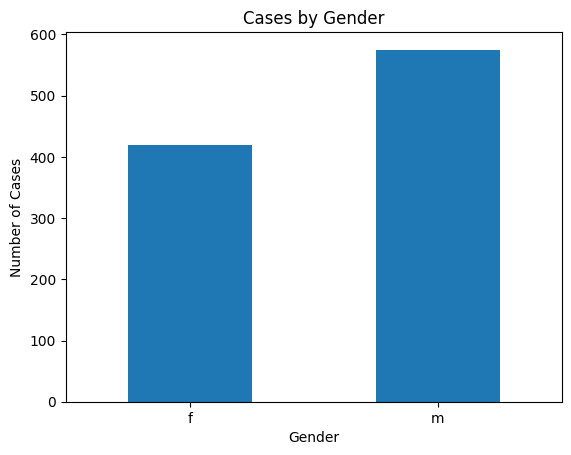

In [404]:
# Plotting the number of cases by gender
merged_data.groupby('gender').size().plot(kind='bar')

# Adding labels and title to the plot
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.title('Cases by Gender')
plt.xticks(rotation=360)

plt.show()


Conclusion : Males are more prone to ASD in comparision to Females

Jaundice

In [447]:
merged_data.groupby('jaundice').size()

jaundice
no     847
yes    149
dtype: int64

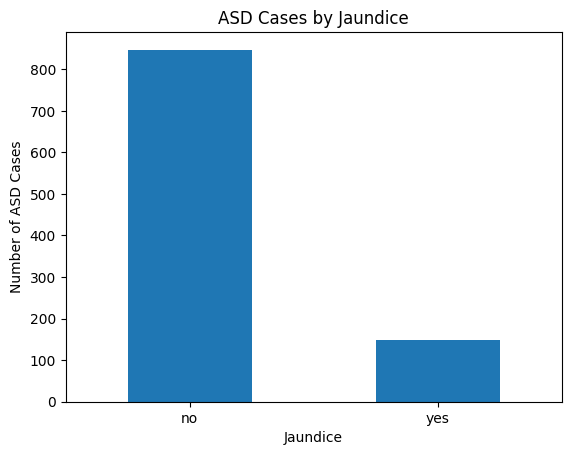

In [448]:
# Plotting the number of cases by jundice
merged_data.groupby('jaundice').size().plot(kind='bar')

# Adding labels and title to the plot
plt.xlabel('Jaundice')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Jaundice')
plt.xticks(rotation=360)

plt.show()


Conclusion : Having jundice does not determine you will have autism.

Relation

In [407]:
merged_data.groupby("relation").size()

relation
Health care professional     17
Others                        5
Parent                      264
Relative                     45
Self                        525
Unknown                     138
self                          1
dtype: int64

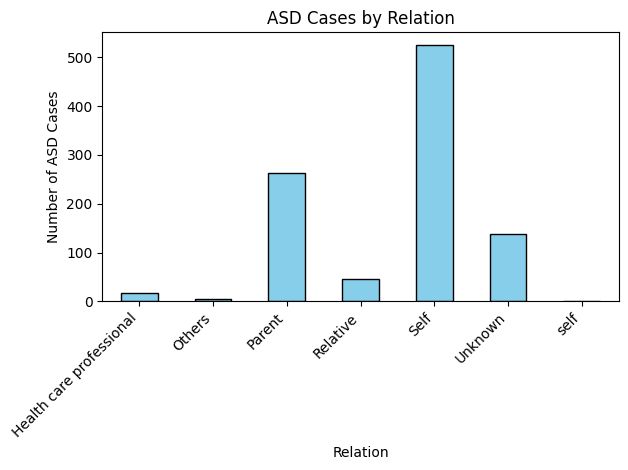

In [408]:
# Aggregate duplicate labels by counting the number of occurrences
relation_counts = merged_data.groupby('relation').size()

# Plot the aggregated counts
relation_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Relation')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Relation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



Conclusion : Most ASD cases around the world do not have their family members with ASD that means ASD is not a genetic disease.

Age

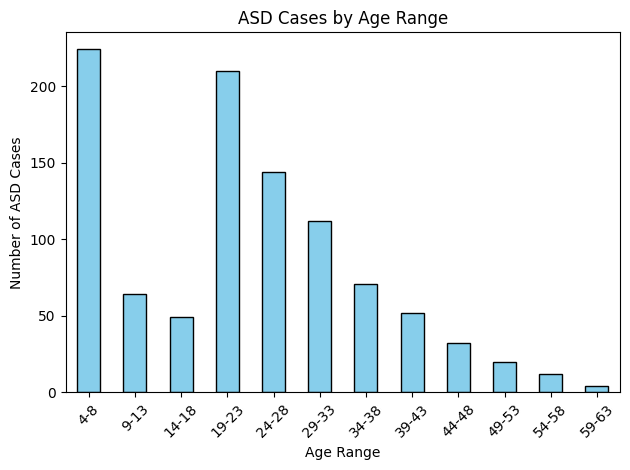

In [420]:
# Create bins from 4 to 64 with a step size of 5
age_bins = np.arange(4, 65, 5)

# Create age labels for the bins
age_labels = [f'{age}-{age+4}' for age in age_bins[:-1]]

# Discretize age into bins and assign labels
merged_data['age_range'] = pd.cut(merged_data['age'], bins=age_bins, labels=age_labels, right=False)

# Plotting the number of cases by age range
merged_data.groupby('age_range').size().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Age Range')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Age Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion: Most ASD cases are highest with persons between 4-8 years and 19-23 years

Qchat-10-Score

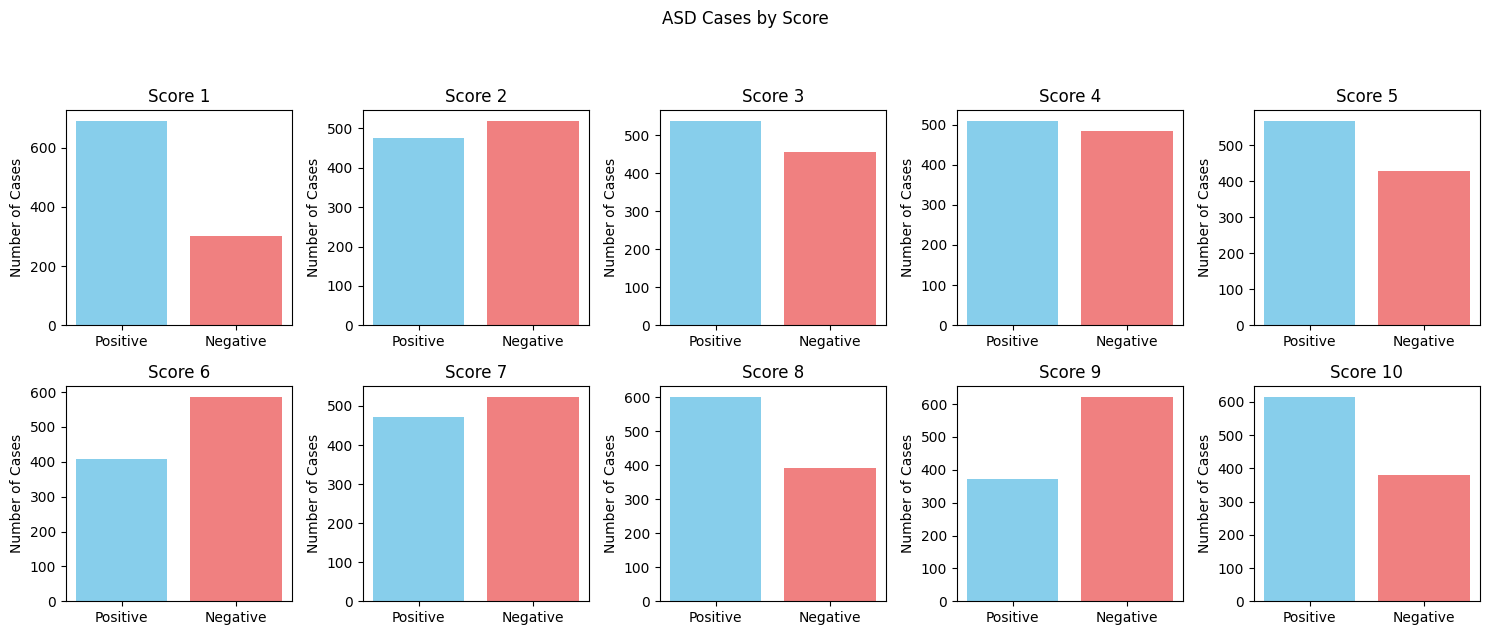

In [410]:
# Get the counts of positive scores for each question
score_counts = merged_data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']].sum()

# Create a bar plot for each score
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
fig.suptitle('ASD Cases by Score', y=1.05)

for i, (score, ax) in enumerate(zip(score_counts.index, axes.flatten())):
    ax.bar(['Positive', 'Negative'], [score_counts[score], len(merged_data) - score_counts[score]], color=['skyblue', 'lightcoral'])
    ax.set_title(f'Score {i+1}')
    ax.set_ylabel('Number of Cases')

plt.tight_layout()
plt.show()



Country

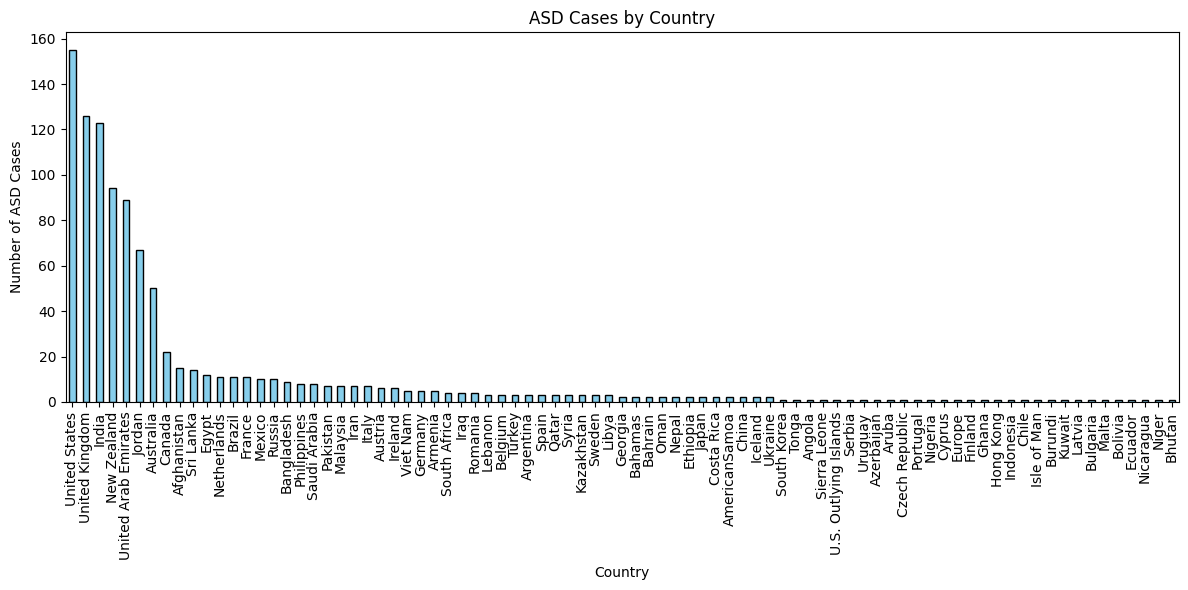

In [421]:
cases_by_country = merged_data.groupby('contry_of_res').size().sort_values(ascending=False)

# Plotting the number of cases by country
plt.figure(figsize=(12, 6))
cases_by_country.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Conclusion more residents of the United States have more ASD cases.

**Feature Relevance**

<ipython-input-463-7b6830ffa793>:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


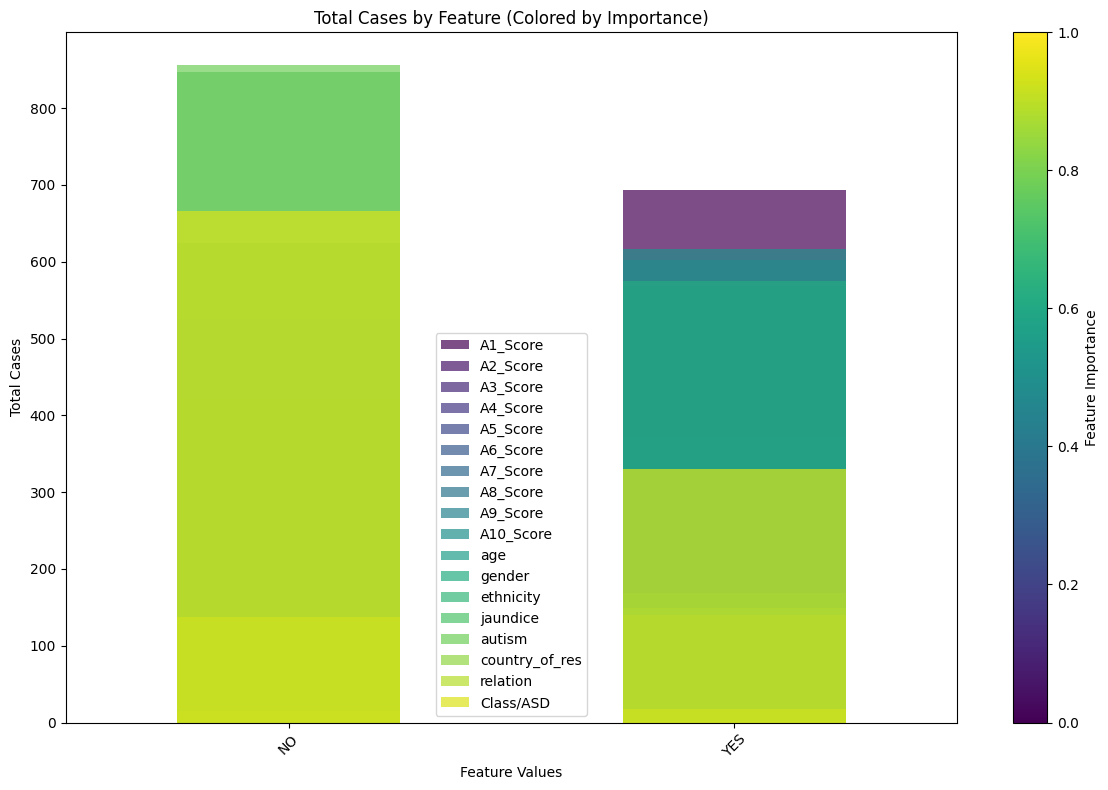

In [463]:
# Define features
features_numerical = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']
features_categorical = ['gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res', 'relation', 'Class/ASD']

# Combine all features
all_features = features_numerical + features_categorical

# Calculate feature importance or relevance scores (you need to replace this with actual feature importance values)
feature_importance = {feature: importance_score for feature, importance_score in zip(all_features, range(len(all_features)))}

# Define colormap
cmap = plt.get_cmap('viridis')  # You can choose any other colormap

# Plot total cases for each feature with colors based on importance
plt.figure(figsize=(12, 8))
for i, feature in enumerate(all_features):
    total_cases = merged_data.groupby(feature).size()
    color = cmap(feature_importance[feature] / len(all_features))  # Normalize importance to [0, 1] for colormap
    total_cases.plot(kind='bar', color=color, alpha=0.7, label=feature)  # Use alpha to make bars transparent for better visualization
plt.title('Total Cases by Feature (Colored by Importance)')
plt.xlabel('Feature Values')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))  # Normalize colormap to [0, 1]
sm.set_array([])  # Set an empty array since we only want colors
cbar = plt.colorbar(sm)
cbar.set_label('Feature Importance')

plt.tight_layout()
plt.show()



9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

**Types of Data:**
1. **Numerical:**
   - A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score_Score, age

2. **Categorical:**
   - gender, ethnicity, jaundice, autism, country_of_res, used_app_before, result, age_desc, relation, Class/ASD

**Preprocessing Steps:**

1. **Handling Missing Data:**
   - Identify missing values represented by '?' in the dataset.
   - Replace missing values with appropriate imputation techniques (e.g., mode for categorical features, mean or median for numerical features).

2. **Encoding Categorical Variables:**
   - Perform one-hot encoding for categorical variables to convert them into binary vectors, creating separate binary columns for each category.

3. **Normalization and Scaling:**
   - Normalize numerical features like age using techniques such as Min-Max scaling or Z-score normalization to ensure they are on a similar scale and reduce the impact of outliers.

4. **Outlier Detection and Treatment:**
   - Identify outliers in numerical features using statistical methods like Z-score or visualization techniques like box plots.
   - Apply outlier treatment methods such as trimming or winsorization to mitigate the influence of outliers on the analysis.

5. **Data Validation:**
   - Validate the preprocessed dataset to ensure that all missing values are handled, categorical variables are properly encoded, and numerical features are normalized.



In [464]:
# Print out relevant features and their importance scores
print("Relevant features and their importance scores:")
for feature, importance_score in feature_importance.items():
    print(f"Feature: {feature}, Importance Score: {importance_score}")


Relevant features and their importance scores:
Feature: A1_Score, Importance Score: 0
Feature: A2_Score, Importance Score: 1
Feature: A3_Score, Importance Score: 2
Feature: A4_Score, Importance Score: 3
Feature: A5_Score, Importance Score: 4
Feature: A6_Score, Importance Score: 5
Feature: A7_Score, Importance Score: 6
Feature: A8_Score, Importance Score: 7
Feature: A9_Score, Importance Score: 8
Feature: A10_Score, Importance Score: 9
Feature: age, Importance Score: 10
Feature: gender, Importance Score: 11
Feature: ethnicity, Importance Score: 12
Feature: jaundice, Importance Score: 13
Feature: autism, Importance Score: 14
Feature: country_of_res, Importance Score: 15
Feature: relation, Importance Score: 16
Feature: Class/ASD, Importance Score: 17


In [460]:
# Specify the file path where you want to save the processed data
file_path = '/content/drive/MyDrive/Merged_data.csv'

# Save the processed data to a CSV file
merged_data.to_csv(file_path, index=False)

print("Processed data saved successfully to:", file_path)


Processed data saved successfully to: /content/drive/MyDrive/Merged_data.csv



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

1. **Handling Missing Data**:
   - Identify missing values in the dataset.
   - Decide on an appropriate strategy for handling missing data:
     - Imputation: Replace missing values with mean, median, mode, or a predicted value.
     - Deletion: Remove rows or columns with missing values.
   - Implement the chosen strategy to fill or remove missing values from the dataset.

2. **Handling Outliers**:
   - Identify outliers in numerical features using statistical methods like Z-score, IQR, or visualization techniques such as box plots.
   - Decide on a strategy for handling outliers:
     - Winsorization: Cap extreme values by replacing them with a specified percentile.
     - Transformation: Apply mathematical transformations like log transformation.
     - Removal: Delete outliers if they are deemed erroneous or influential.
   - Implement the chosen strategy to handle outliers in the dataset.

3. **Encoding Categorical Variables**:
   - Identify categorical variables in the dataset.
   - Choose an appropriate encoding method based on the nature of the categorical variables and the machine learning algorithm to be used:
     - One-hot encoding: Convert categorical variables into binary vectors.
     - Label encoding: Encode categorical variables with integer labels.
   - Apply the selected encoding method to transform categorical variables into numerical format.

4. **Normalization and Scaling**:
   - Check the scale and distribution of numerical features in the dataset.
   - Decide whether normalization or scaling is necessary based on the requirements of the machine learning algorithm being used.
   - Choose an appropriate normalization or scaling technique:
     - Min-Max normalization: Scale features to a specified range, typically between 0 and 1.
     - Standardization: Standardize features to have a mean of 0 and a standard deviation of 1.
   - Apply the selected normalization or scaling technique to numerical features.

5. **Transformation to Unified Format**:
   - Combine the processed numerical and encoded categorical features into a unified dataset.
   - Verify that the dataset is now free of missing data, outliers are appropriately handled, and all features are transformed into a consistent format suitable for analysis and modeling.



11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.


1. **Location**: Store data on-premises, in the cloud (e.g., AWS, Azure), or a hybrid approach.

2. **Format**: Choose between CSV, Parquet, databases (e.g., MySQL, PostgreSQL), or NoSQL solutions (e.g., MongoDB).

3. **Security**: Implement encryption, access controls, and regular security audits to protect data integrity.

4. **Accessibility**: Ensure authorized users have access via secure channels like VPNs or web interfaces.

5. **Backup**: Use automated backup solutions or cloud storage redundancy to prevent data loss.

6. **Scalability**: Consider scalable cloud storage solutions like Amazon S3 or Google Cloud Storage.

7. **Governance**: Adhere to data handling regulations (e.g., GDPR, HIPAA) and implement governance policies.

7. **Governance**: Follow rules and regulations about data handling to stay compliant and accountable.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.